In [45]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [46]:
from keras.datasets import cifar10

In [47]:
df=cifar10.load_data()

In [48]:
df

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [49]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [50]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [51]:
x_train=x_train.astype('float64')/255
x_test=x_test.astype('float64')/255

In [52]:
x_train.dtype
x_test.dtype

dtype('float64')

In [53]:
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


In [54]:
from keras.utils import np_utils
from keras.utils import to_categorical

In [55]:
num_classes= len(np.unique(y_train))

In [56]:
num_classes

10

In [57]:
print(y_train)
len(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


50000

In [58]:
y_train= to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)

In [59]:
(y_train, y_valid) = y_train[5000:], y_train[:5000]
(x_train, x_valid) = x_train[5000:], x_train[:5000]

In [60]:
print(y_train.shape)
print(x_train.shape)

(45000, 10)
(45000, 32, 32, 3)


### Import the Deep Learning Libraries

In [61]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [62]:
model=Sequential()

In [63]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))

In [64]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))


In [65]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))


In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 16)        

In [67]:
model.add(Flatten())

In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 16)        

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
batchsize =[10,20,40,60,80,100]
epoch=[10,30,50]

In [71]:
parameter_grid = dict(batch_size=batchsize,epochs=epoch)

mygrid =GridSearchCV(estimator=model, param_grid=parameter_grid,n_jobs=1,cv=3)



In [72]:
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))

In [73]:
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))

In [74]:
model.add(Dense(units=10,activation='softmax',kernel_initializer='uniform'))

In [75]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 16)        

In [83]:
answers=model.fit(x_train,y_train,validation_data=(x_valid,y_valid),shuffle=True,epochs=20,verbose=2,batch_size=700)

Epoch 1/20
65/65 - 7s - loss: 1.3126 - accuracy: 0.5161 - val_loss: 1.3491 - val_accuracy: 0.5096 - 7s/epoch - 114ms/step
Epoch 2/20
65/65 - 7s - loss: 1.2585 - accuracy: 0.5392 - val_loss: 1.2762 - val_accuracy: 0.5430 - 7s/epoch - 110ms/step
Epoch 3/20
65/65 - 7s - loss: 1.2296 - accuracy: 0.5504 - val_loss: 1.2658 - val_accuracy: 0.5456 - 7s/epoch - 108ms/step
Epoch 4/20
65/65 - 7s - loss: 1.1943 - accuracy: 0.5644 - val_loss: 1.2658 - val_accuracy: 0.5544 - 7s/epoch - 108ms/step
Epoch 5/20
65/65 - 7s - loss: 1.1689 - accuracy: 0.5749 - val_loss: 1.2070 - val_accuracy: 0.5686 - 7s/epoch - 109ms/step
Epoch 6/20
65/65 - 7s - loss: 1.1319 - accuracy: 0.5875 - val_loss: 1.2136 - val_accuracy: 0.5722 - 7s/epoch - 109ms/step
Epoch 7/20
65/65 - 7s - loss: 1.1040 - accuracy: 0.5987 - val_loss: 1.1963 - val_accuracy: 0.5820 - 7s/epoch - 108ms/step
Epoch 8/20
65/65 - 7s - loss: 1.0798 - accuracy: 0.6067 - val_loss: 1.2090 - val_accuracy: 0.5802 - 7s/epoch - 109ms/step
Epoch 9/20
65/65 - 7s - 

In [78]:
results=model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.3744 - accuracy: 0.4941


In [79]:
results

[1.3744444847106934, 0.49410000443458557]

In [80]:
answers.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

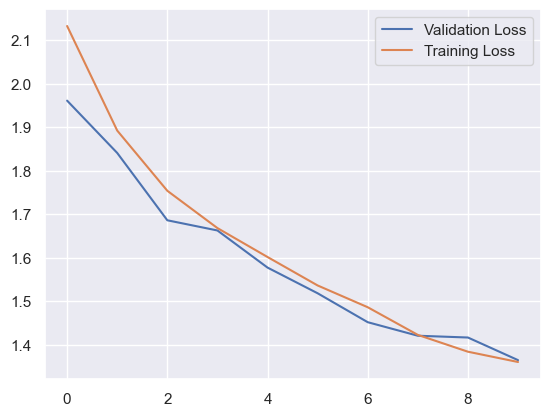

In [81]:
plt.plot(answers.history['val_loss'],label='Validation Loss')
plt.plot(answers.history['loss'],label='Training Loss')
plt.legend()

<function matplotlib.pyplot.legend(*args, **kwargs)>

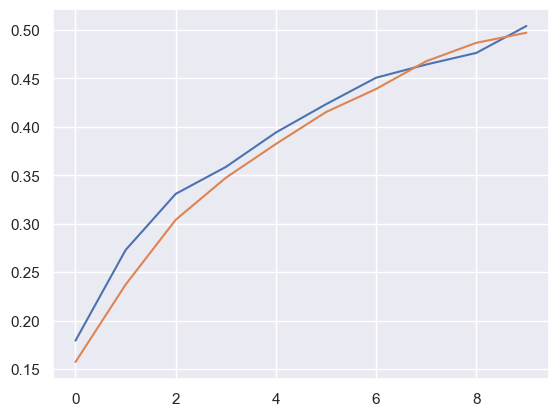

In [82]:
plt.plot(answers.history['val_accuracy'],label='Validation Accuracy')
plt.plot(answers.history['accuracy'],label='Training Accuracy')
plt.legend